In [1]:
from dataset import APOGEEDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:

def plot_spectra_with_uncertainty(dataset, num_samples=4):
    print("loading")
    loader = DataLoader(dataset, batch_size=num_samples, shuffle=True)
    print("loading done")
    data_iter = iter(loader)
    sample_data = next(data_iter)

    fig, axs = plt.subplots(num_samples, 1, figsize=(10, num_samples * 3))

    for i in range(num_samples):
        flux = sample_data['flux'][i].numpy()
        wavelength = sample_data['wavelength'][i].numpy()
        mask = sample_data['flux_mask'][i].numpy()
        sigma = sample_data['sigma'][i].numpy()

        upper_bound = flux + mask * sigma
        lower_bound = flux - mask * sigma

        axs[i].plot(wavelength, flux, label='Flux', color='blue')
        axs[i].fill_between(wavelength, lower_bound, upper_bound, color='gray', alpha=0.5, label='Flux ± Mask*Sigma')
        axs[i].legend()
        axs[i].set_xlabel('Wavelength (Angstroms)')
        axs[i].set_ylabel('Flux')
        axs[i].set_title(f'Spectrum {i+1}')

    plt.tight_layout()
    plt.savefig(f'spectra_with_uncertainty_{i}')
    plt.show()



In [3]:
dataset_path = '../data/hdf5/spectra500.hdf5'  
dataset = APOGEEDataset(dataset_path, max_files=4) 
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [4]:
def plot_spectrum(wavelength, flux):
    """
    Plots the spectrum using wavelength and flux data.
    Args:
        wavelength (Tensor): Wavelength data as a PyTorch tensor.
        flux (Tensor): Flux data as a PyTorch tensor.
    """
   
    wavelength = wavelength.numpy()
    flux = flux.numpy()
    
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, flux, label='Spectrum')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux')
    plt.title('APOGEE Spectrum')
    plt.legend()
    plt.show()


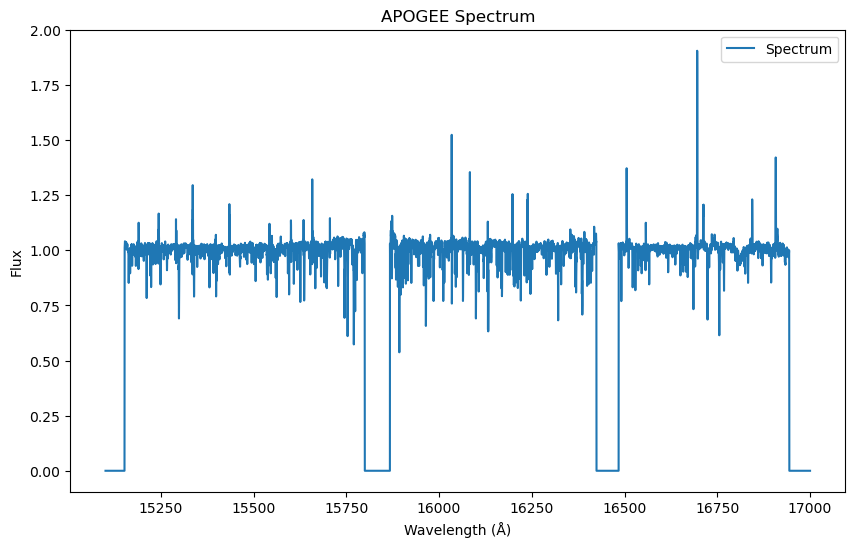

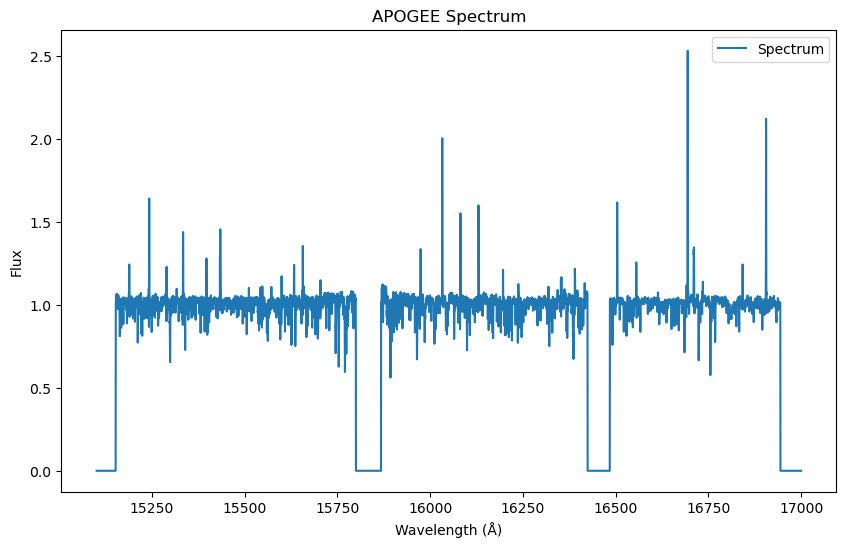

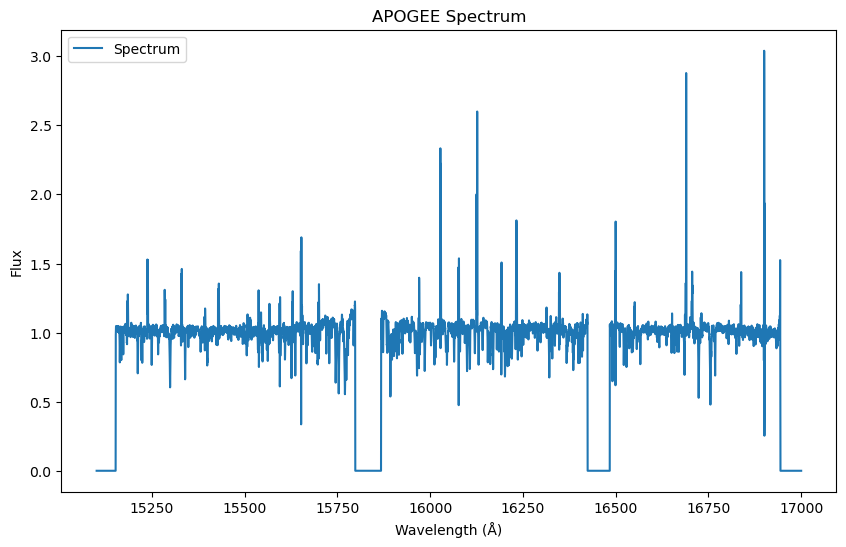

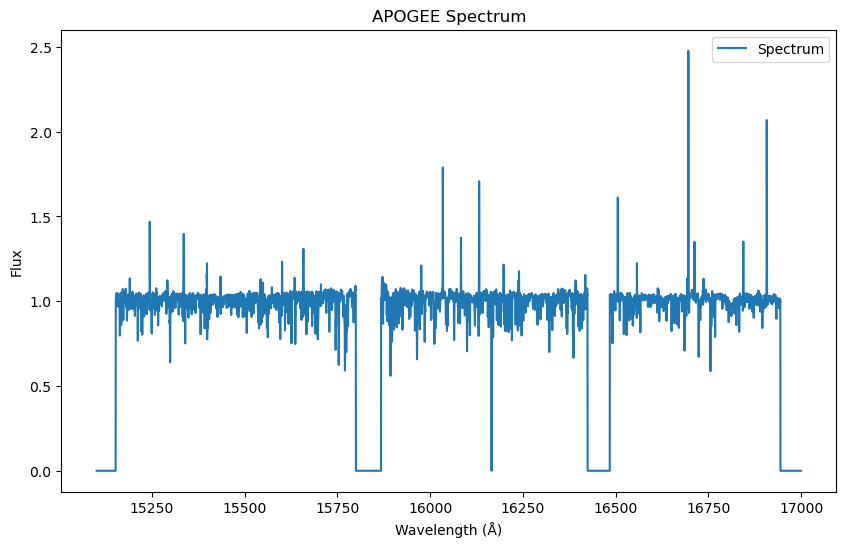

In [5]:
for data in dataloader:
    wavelengths, fluxes = data['wavelength'], data['flux']
    plot_spectrum(wavelengths[0], fluxes[0])
    plot_spectrum(wavelengths[1], fluxes[1])
    plot_spectrum(wavelengths[2], fluxes[2])
    plot_spectrum(wavelengths[3], fluxes[3])
   
    break

In [6]:

def plot_spectrum_with_mask(wavelength, flux, mask, sigma):
    """
    Plots the spectrum and mask using wavelength, flux, and mask data.
    Args:
        wavelength (Tensor): Wavelength data as a PyTorch tensor.
        flux (Tensor): Flux data as a PyTorch tensor.
        mask (Tensor): Mask data as a PyTorch tensor, with values 0 or 1.
    """
   
    wavelength = wavelength.numpy()
    flux = flux.numpy()
    mask = mask.numpy()   
    sigma = sigma.numpy()
    weight = mask* sigma
    total = flux + weight
    
    upper_bound = flux + mask * sigma
    lower_bound = flux - mask * sigma
    
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, flux, label='Flux', color='blue', linewidth=0.1)
    plt.fill_between(wavelength, lower_bound, upper_bound, color='red', alpha=0.5, label='Flux ± Mask*Sigma', linewidth=0.1)
    plt.legend()
    plt.ylim(0.8, 1.2)
    plt.xlim(16250,16500)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux')
    
    plt.savefig('sigma_less_0025.png')
    plt.show()





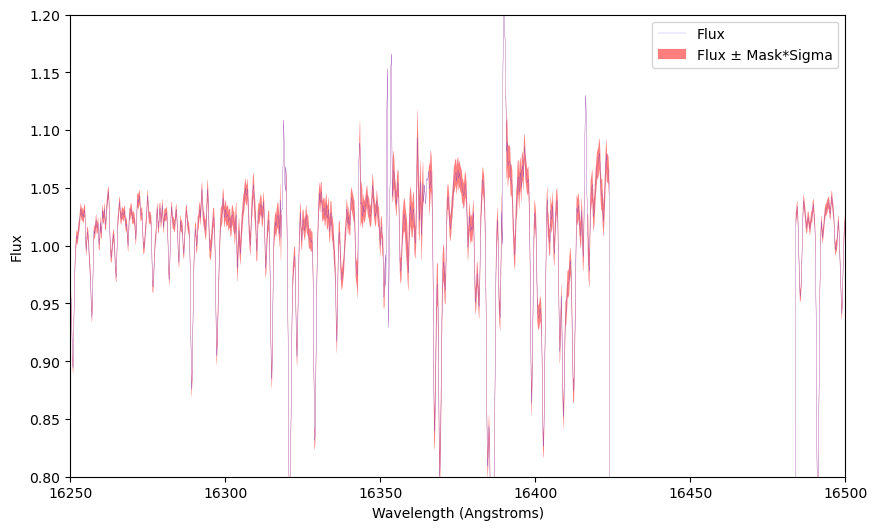

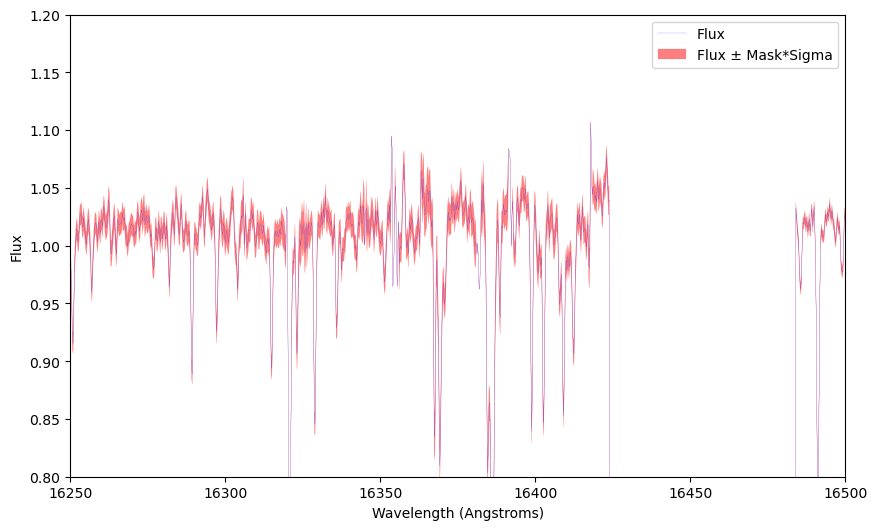

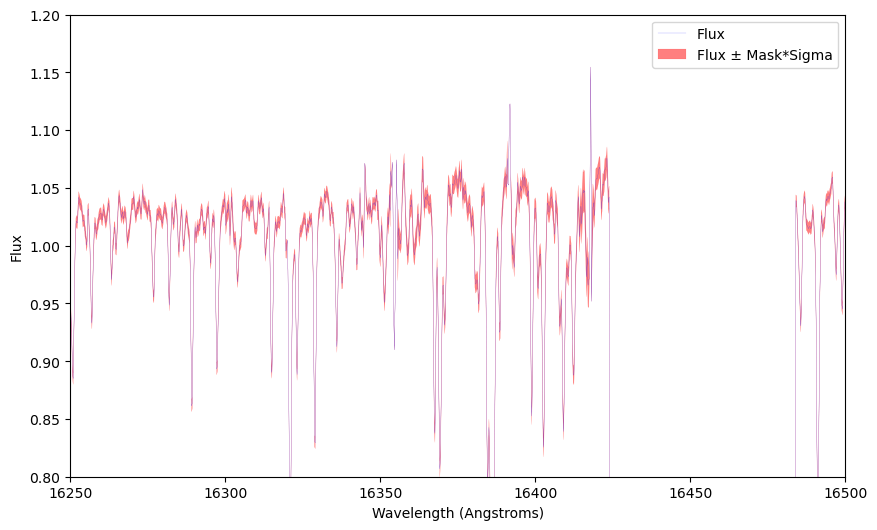

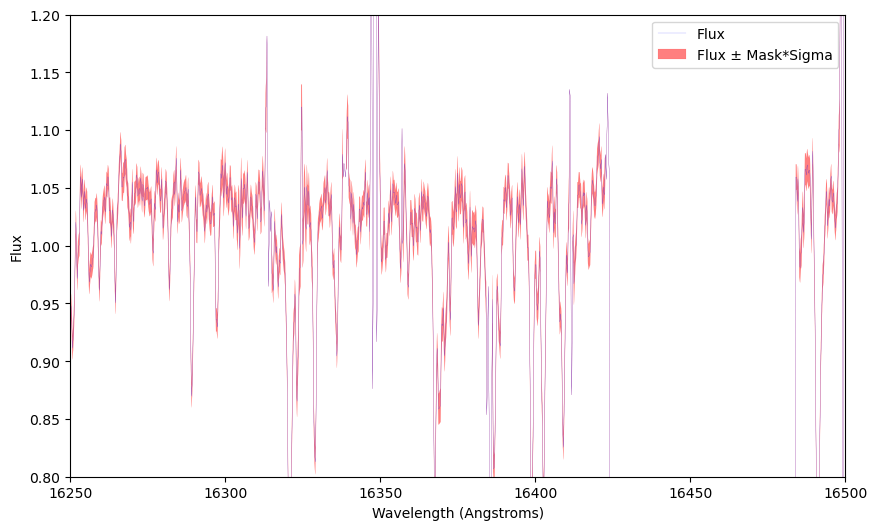

In [7]:
for data in dataloader:
    wavelengths, fluxes, mask, sigma = data['wavelength'], data['flux'], data['flux_mask'], data['sigma']
    plot_spectrum_with_mask(wavelengths[0], fluxes[0], mask[0], sigma[0])
    plot_spectrum_with_mask(wavelengths[1], fluxes[1], mask[1], sigma[1])
    plot_spectrum_with_mask(wavelengths[2], fluxes[2], mask[2], sigma[2])
    plot_spectrum_with_mask(wavelengths[3], fluxes[3], mask[3], sigma[3])
   
    break

In [8]:

def plot_weight(wavelength, mask, sigma):
    """
    Plots the spectrum and mask using wavelength, flux, and mask data.
    Args:
        wavelength (Tensor): Wavelength data as a PyTorch tensor.
        flux (Tensor): Flux data as a PyTorch tensor.
        mask (Tensor): Mask data as a PyTorch tensor, with values 0 or 1.
    """
    # Convert PyTorch tensors to numpy arrays for plotting
    wavelength = wavelength.numpy()
  
    mask = mask.numpy()   
    sigma = sigma.numpy()
    weight = mask * sigma
 
    
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, weight, label='weight', color='red')
    plt.legend()
    # plt.ylim(0.8, 1.2)
    # plt.xlim(16000,16100)
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('weight mask*sigma')
    
    plt.savefig('weight_sigma_less_0025.png')
    plt.show()





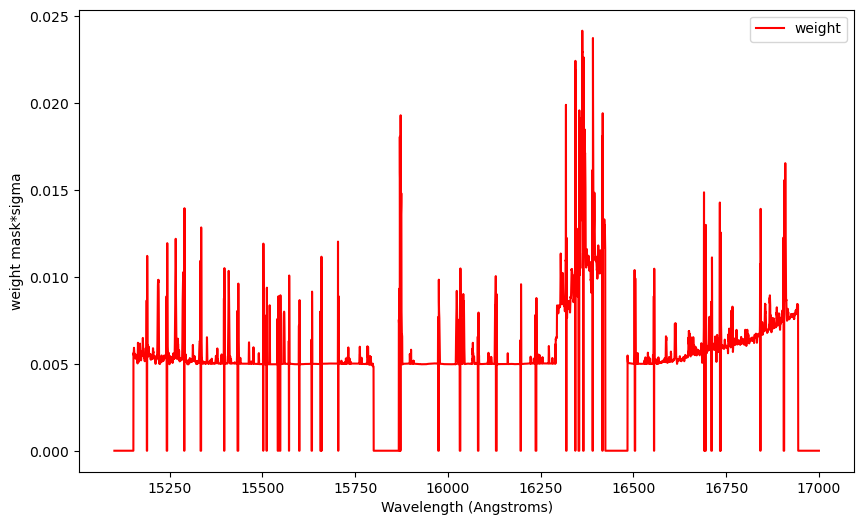

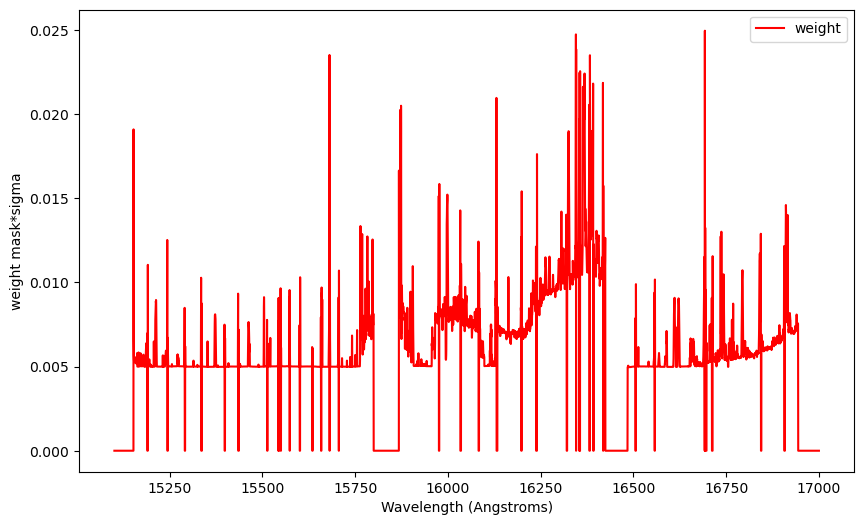

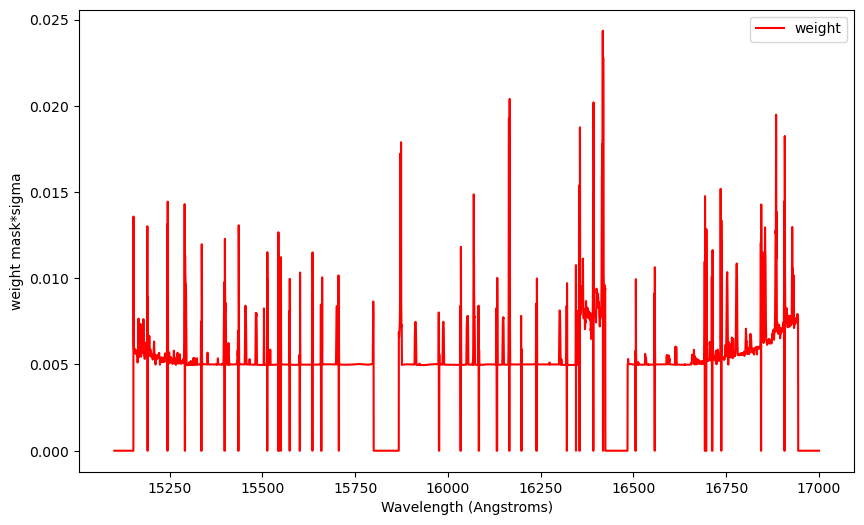

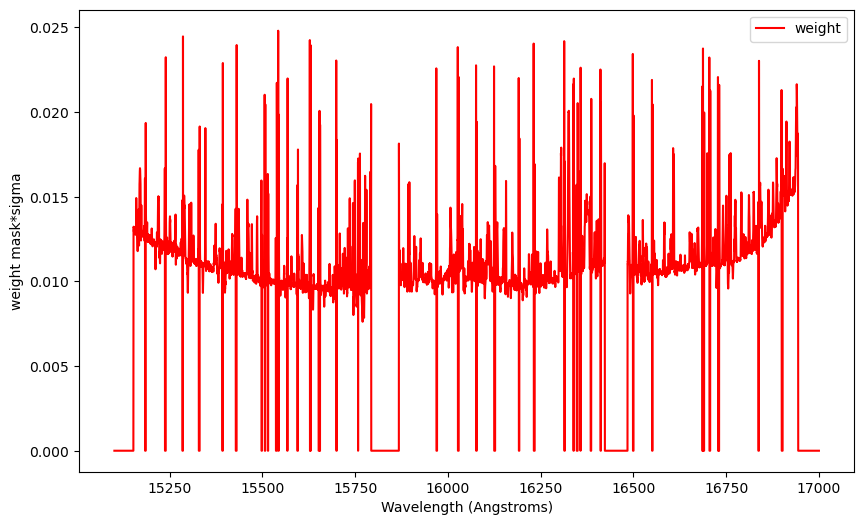

In [9]:
for data in dataloader:
    wavelengths, mask, sigma = data['wavelength'], data['flux_mask'], data['sigma']
    plot_weight( wavelengths[0], mask[0], sigma[0] )
    plot_weight(wavelengths[1], mask[1], sigma[1])
    plot_weight(wavelengths[2], mask[2], sigma[2])
    plot_weight(wavelengths[3], mask[3], sigma[3])
   
    break

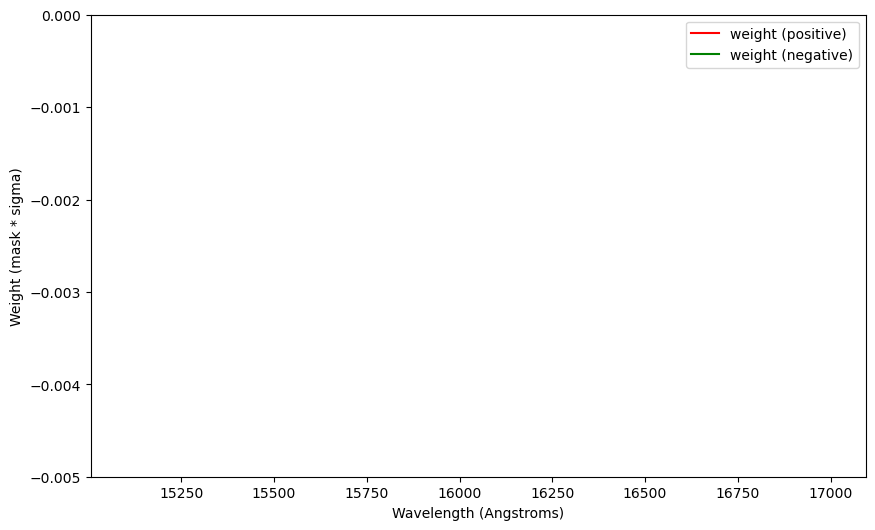

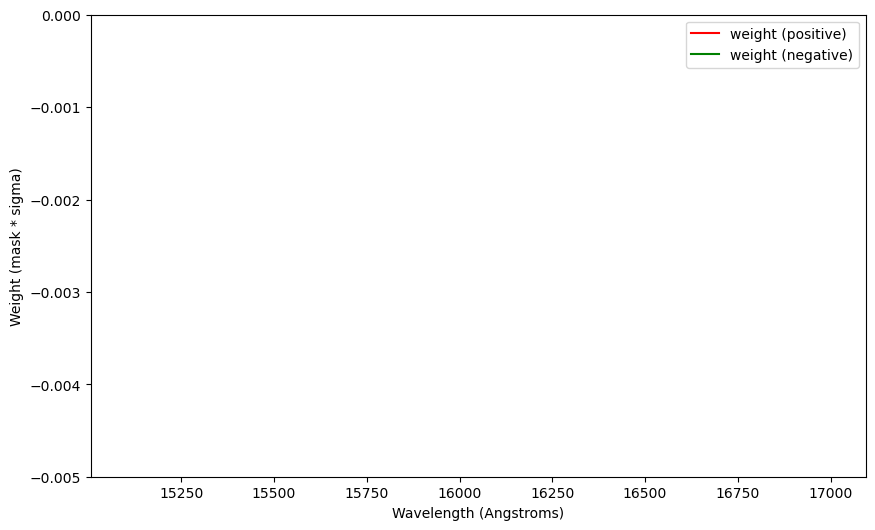

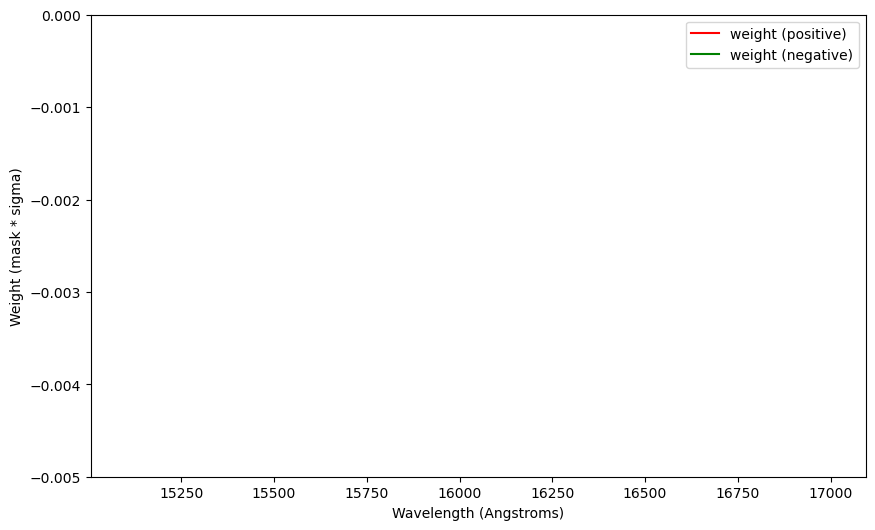

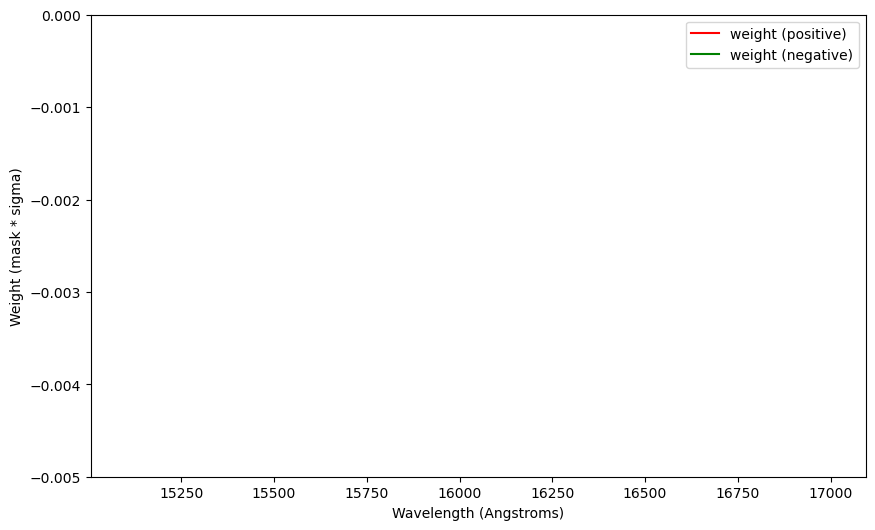

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def plot_weight1(wavelength, mask, sigma):
    """
    Plots the spectrum and mask using wavelength, flux, and mask data.
    Args:
        wavelength (Tensor): Wavelength data as a PyTorch tensor.
        flux (Tensor): Flux data as a PyTorch tensor.
        mask (Tensor): Mask data as a PyTorch tensor, with values 0 or 1.
    """
    # Convert PyTorch tensors to numpy arrays for plotting
    wavelength = wavelength.numpy()
    mask = mask.numpy()   
    sigma = sigma.numpy()
    weight = mask * sigma
    
    plt.figure(figsize=(10, 6))
    
    # Plot weights, using different colors for positive and negative values
    plt.plot(wavelength, np.where(weight >= 0, weight, np.nan), label='weight (positive)', color='red')
    plt.plot(wavelength, np.where(weight < 0, weight, np.nan), label='weight (negative)', color='green')
    
    plt.legend()
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Weight (mask * sigma)')
    plt.ylim(-0.005,0)
    # plt.savefig('weight_sigma_less_0025.png')
    plt.show()

for data in dataloader:
    wavelengths, mask, sigma = data['wavelength'], data['flux_mask'], data['sigma']
    plot_weight1( wavelengths[0], mask[0], sigma[0] )
    plot_weight1(wavelengths[1], mask[1], sigma[1])
    plot_weight1(wavelengths[2], mask[2], sigma[2])
    plot_weight1(wavelengths[3], mask[3], sigma[3])
   
    break
